# Final Project Wildlife Object Detection Model


In this notebook, I will be loading my wildlife dataset from roboflow, to train on that data and to accurately detect different wildlife.


---



##**Step 1. Mounting the Drive and loading Libraries**

In [1]:

# Mount Google Drive ------------------------------------
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Install YOLOv11 (Ultralytics) -------------------------
!pip install ultralytics  # version with YOLOv11 support
from ultralytics import YOLO
import os

##**Step 2. Loading the Data From Roboflow**

In [4]:
# Load the Data drom Roboflow....
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fY9UOIf8MTNhhRIVIxZC")
project = rf.workspace("wildlife-monitoring-6xfso").project("wildlife-h0udb")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Wildlife-1 in yolov11:: 100%|██████████| 644/644 [00:00<00:00, 6692.98it/s]


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:

# Copy YOLOv11 Dataset from Roboflow to Google Drive Folder
import os

print("Dataset downloaded at:", dataset.location)

# The dataset will typically be in /content/<project_name>-<version_number>

# --- STEP 2: Define your target folder ------------------------
target_folder = "/content/drive/MyDrive/CS440 Final Project"  # change this as needed
os.makedirs(target_folder, exist_ok=True)

# --- STEP 3: Copy dataset to your folder ----------------------
# Use Linux 'cp -r' for reliable recursive copy
!cp -r "$dataset.location"/* "$target_folder"/

print(f"Dataset successfully copied to: {target_folder}")


Dataset downloaded at: /content/Wildlife-1
Dataset successfully copied to: /content/drive/MyDrive/CS440 Final Project


##**Step 3. Load and Train the YOLOv11 Model**

In [6]:

# Load and Train YOLOv11 Model -------------------------
model = YOLO("yolo11n.pt")   # n = nano (lightweight)
results = model.train(
    data="/content/drive/MyDrive/CS440 Final Project/data.yaml", # Change it to the yaml file location
    epochs=15,
    imgsz=640,
    batch=16,
    name="wildlife_v1"
)

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/CS440 Final Project/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=wildlife_v14, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

In [8]:
# Copying the result to the folder we want to save ....
# Define source and destination paths
source = "/content/runs/detect/wildlife_v14"
destination = "/content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11"

# Create target folder in Drive
!mkdir -p "$destination"

# Move everything
!cp -r "$source"/* "$destination"

print("All YOLOv11 detection results have been copied to:")
print(destination)

All YOLOv11 detection results have been copied to:
/content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11


##**Step 4. Load the trained model for validation**

In [9]:
from ultralytics import YOLO
import os

# Path to your saved weights
MODEL_PATH = "/content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11/weights/best.pt"

# Load the trained YOLOv11 model
model = YOLO(MODEL_PATH)
print("Model loaded successfully!")


Model loaded successfully!


##**Step 5. Model Results**

In [10]:
# Evaluate the model on the validation set
metrics = model.val(data="/content/drive/MyDrive/CS440 Final Project/data.yaml", imgsz=640, split='val')


# Correct way to print performance summary
print(f"Mean Precision (mP): {metrics.box.mp:.3f}")
print(f"Mean Recall (mR): {metrics.box.mr:.3f}")
print(f"mAP@0.5: {metrics.box.map50:.3f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.3f}")


Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,588,002 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 55.7±5.6 MB/s, size: 92.8 KB)
val: Scanning /content/drive/MyDrive/CS440 Final Project/valid/labels.cache... 27 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 27/27 47.2Kit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 27, len(boxes) = 31. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.6it/s 1.3s
                   all         27         31      0.391      0.335      0.412      0.286
                   dog          2          2          1      0.859      0.995      0.921
                 horse    

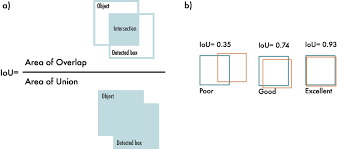

| Metric                  | Meaning                                                | Your Value | Interpretation                                                                  |
| ----------------------- | ------------------------------------------------------ | ---------- | ------------------------------------------------------------------------------- |
| **Mean Precision (mP)** | % of predicted objects that were correct               | **0.73**  | 65% of detections were correct — moderate precision; some false positives exist |
| **Mean Recall (mR)**    | % of real objects correctly detected                   | **0.44**  | Model detected ~64% of true cracks/molds — missing some actual defects          |
| **mAP@0.5**             | Accuracy of localization & classification at IoU ≥ 0.5 | **0.590**  | Reasonable start for a small/heterogeneous dataset                              |
| **mAP@0.5:0.95**        | Stricter accuracy averaged over IoUs                   | **0.20**  | Low — model struggles with precise localization or small object boundaries      |


What is mAP (mean Average Precision)?

Since your dataset has multiple classes (crack, mold, maybe background), YOLO averages all AP values:
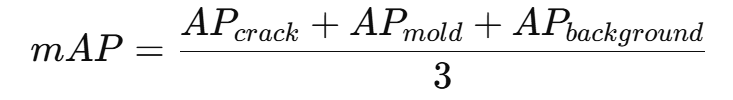
	​

	​

Two Common Forms:
Metric	Meaning
mAP@0.5	Average Precision with IoU ≥ 0.5 (lenient overlap)
mAP@0.5:0.95	Average Precision averaged over IoU thresholds (0.5 → 0.95 step 0.05) — much stricter
Example:
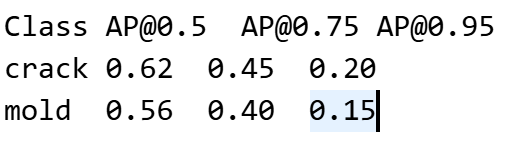

Why Do We Use Both?

mAP@0.5 tells you if your model can roughly find the right object.

mAP@0.5:0.95 tells you if your model is very precise in localization.

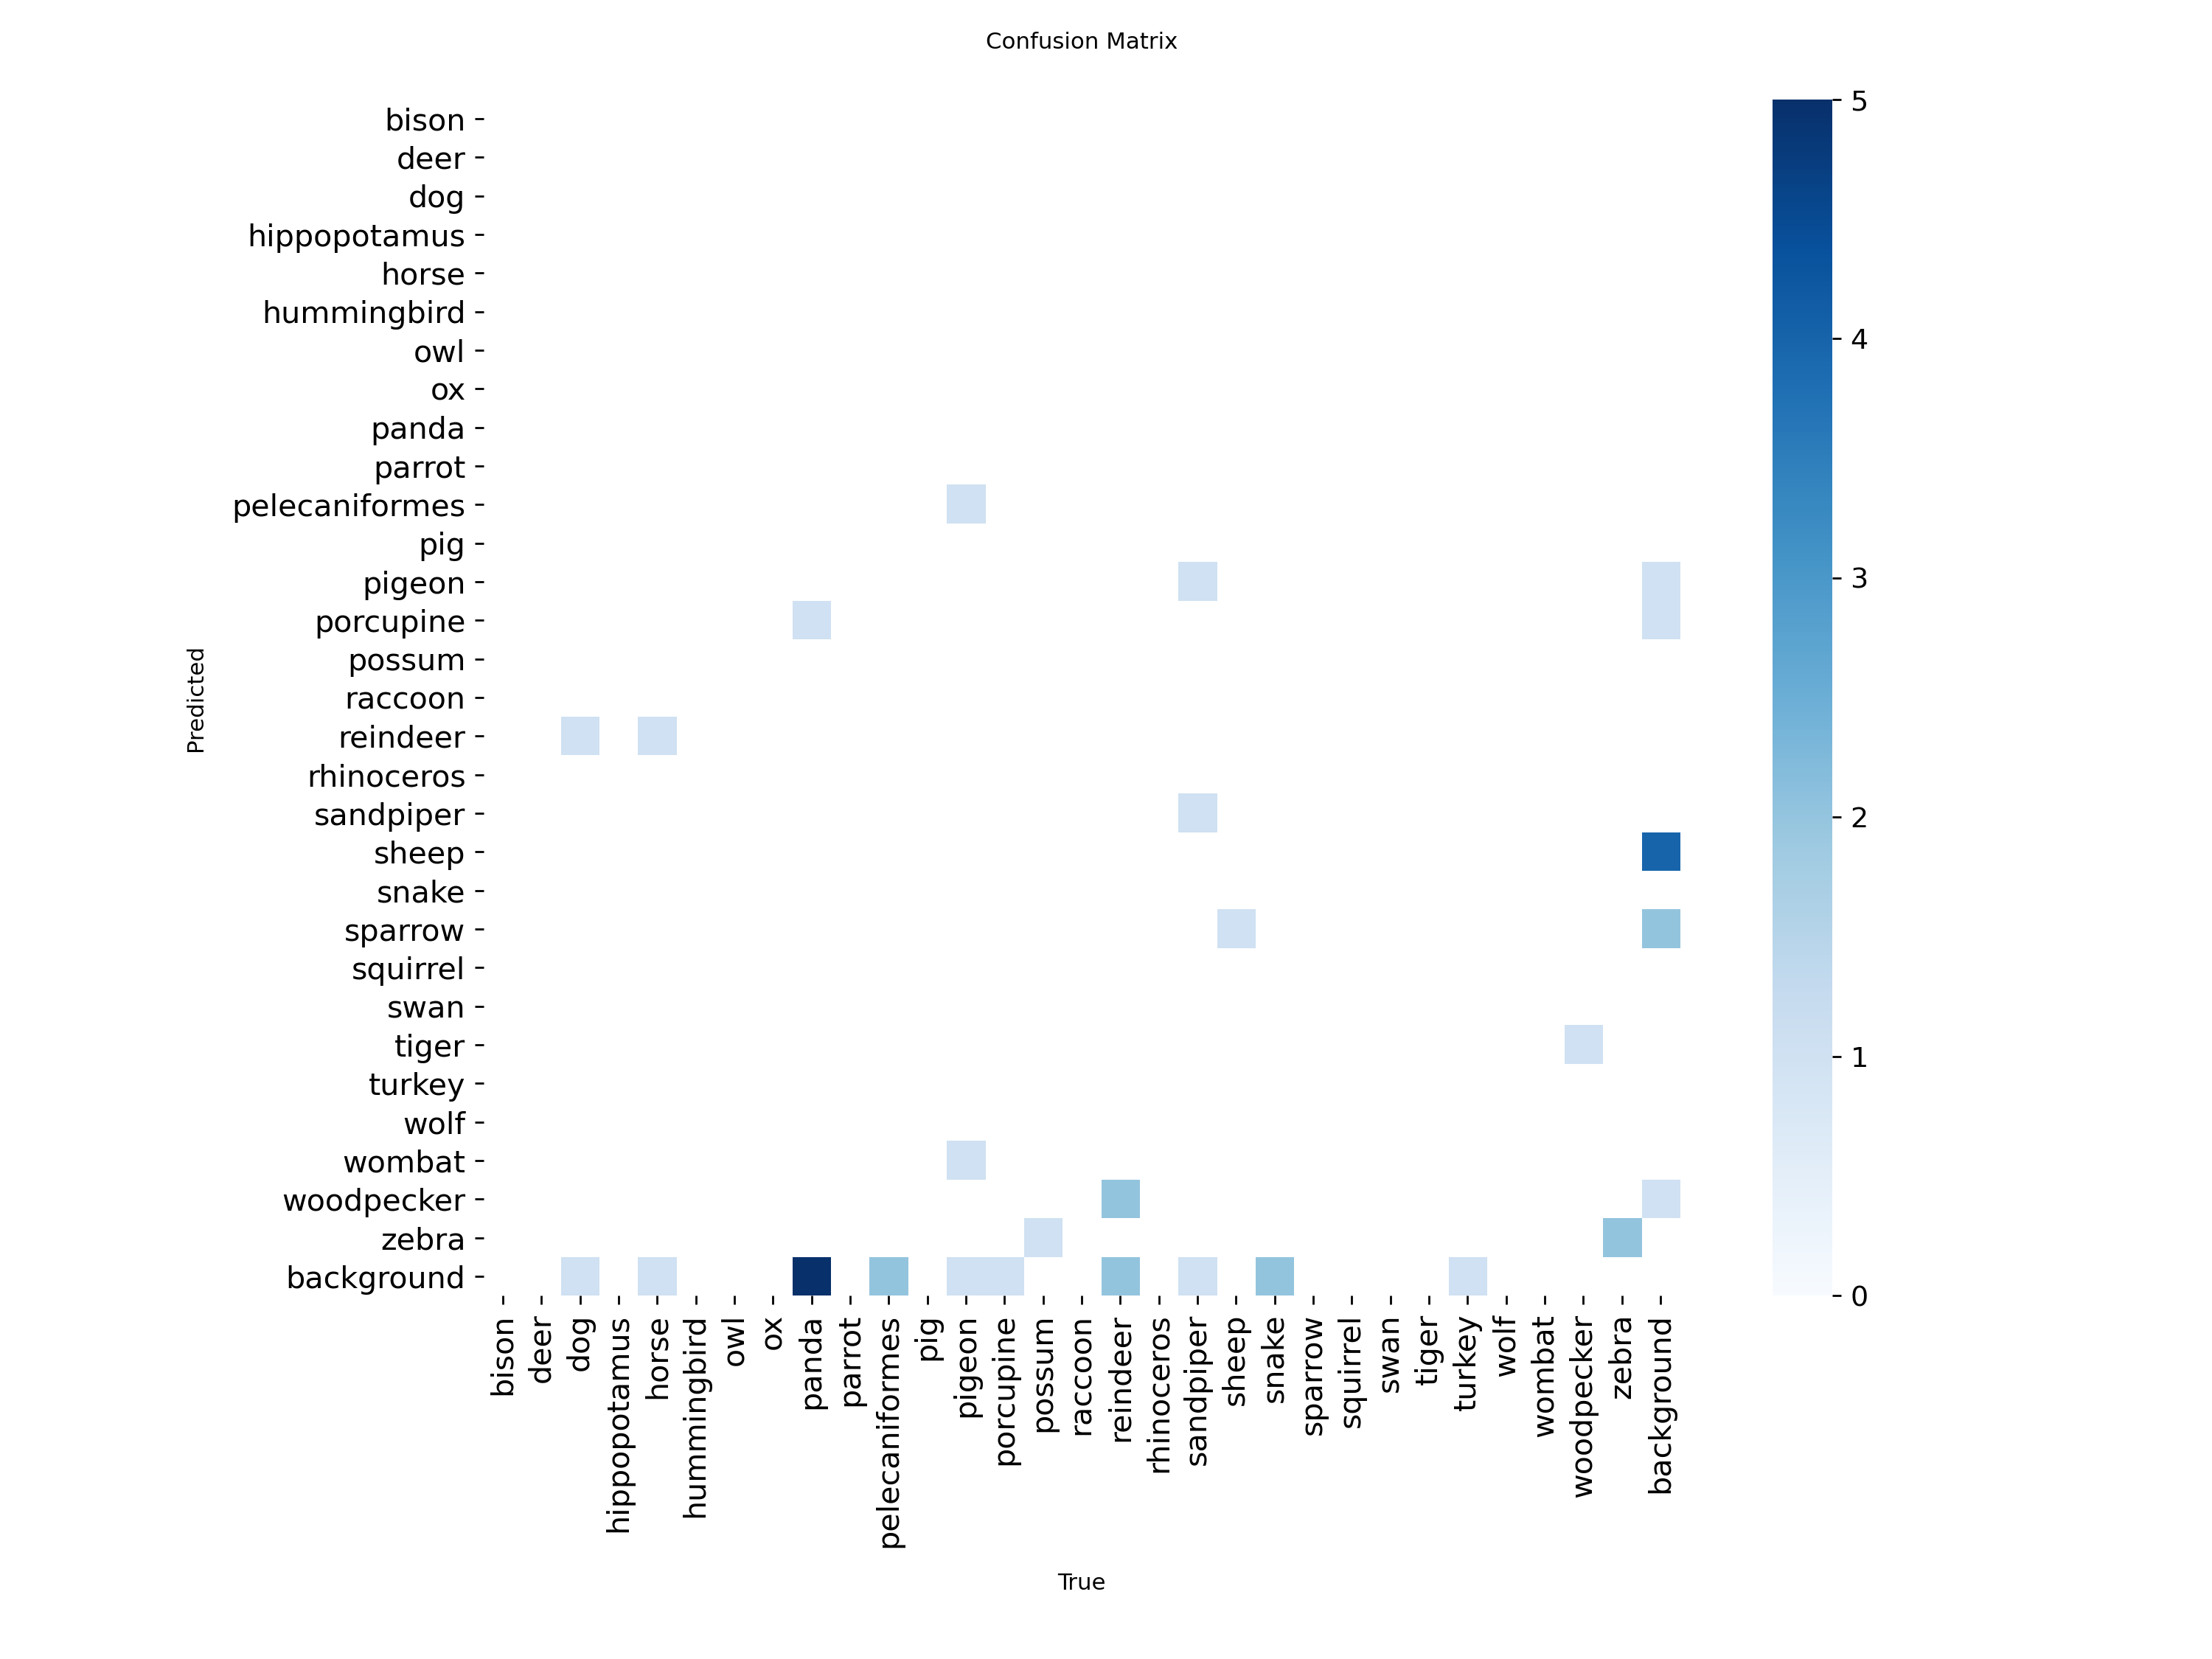

In [11]:
import glob
from IPython.display import Image, display

results_dir = metrics.save_dir  # folder where YOLO saved validation plots

conf_matrix = glob.glob(f"{results_dir}/confusion_matrix.png")

display(Image(filename=conf_matrix[0]))



Model loaded successfully!

image 1/13 /content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11/test/images/06e320f74d_jpg.rf.363772c605ef960f004dc93313bef39b.jpg: 640x640 (no detections), 10.5ms
image 2/13 /content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11/test/images/0eb51dddee_jpg.rf.fa20af9ef9306e06c93dfa7224a7ab9a.jpg: 640x640 (no detections), 8.9ms
image 3/13 /content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11/test/images/0f8ef6ae70_jpg.rf.e0a3f9e6e4537b725d47d127f225f5e8.jpg: 640x640 (no detections), 8.3ms
image 4/13 /content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11/test/images/346dc7e188_jpg.rf.f7c1b03aa78bdec737c4c5c5ed9733c0.jpg: 640x640 (no detections), 8.5ms
image 5/13 /content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11/test/images/3da1bb8c28_jpg.rf.75911c5cf1f77e7e16e7f6d4a2e0eff9.jpg: 640x640 (no detections), 9.0ms
image 6/13 /content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11/test/images/46ad98ef1b_jpg

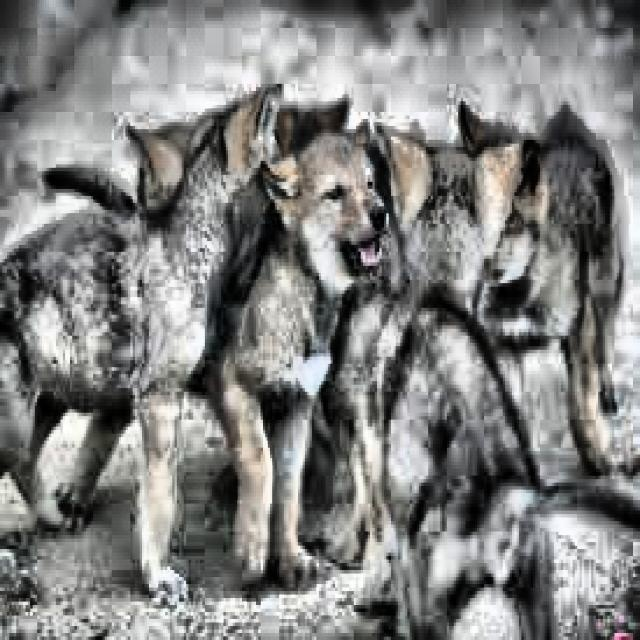

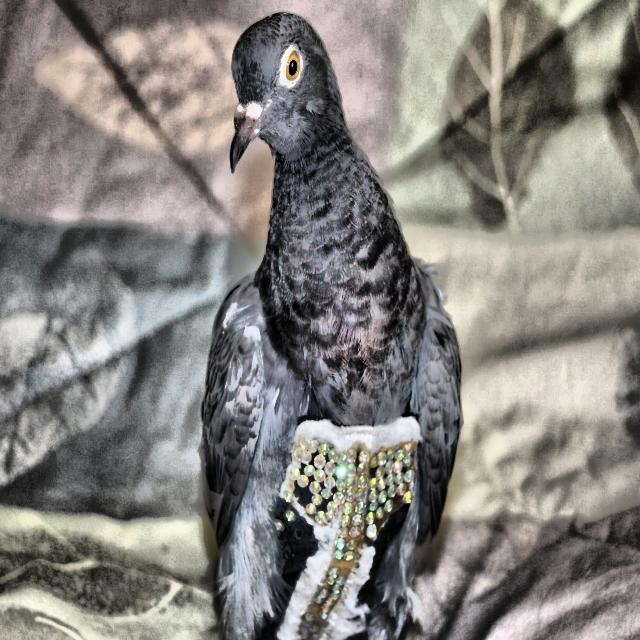

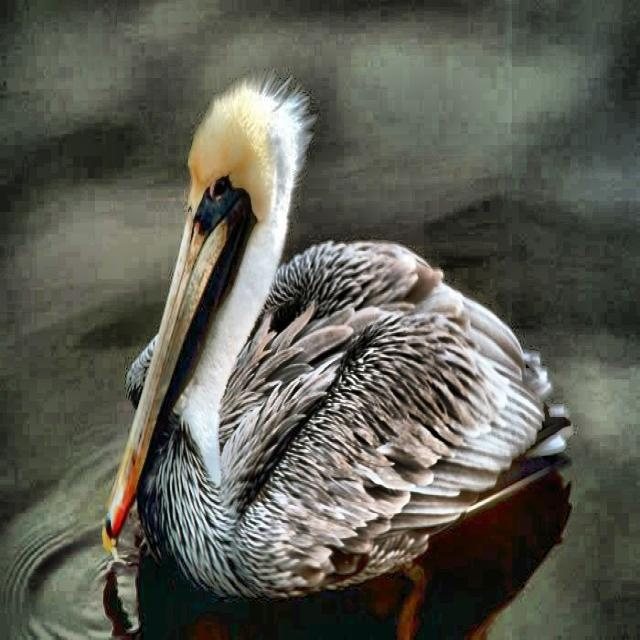

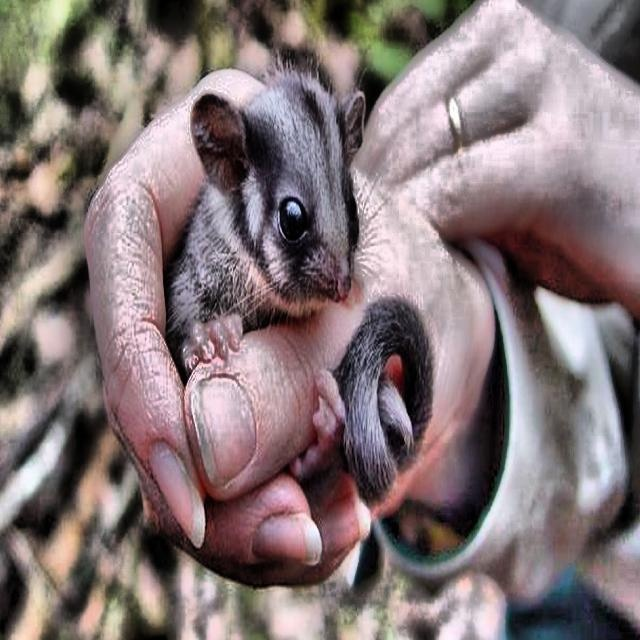

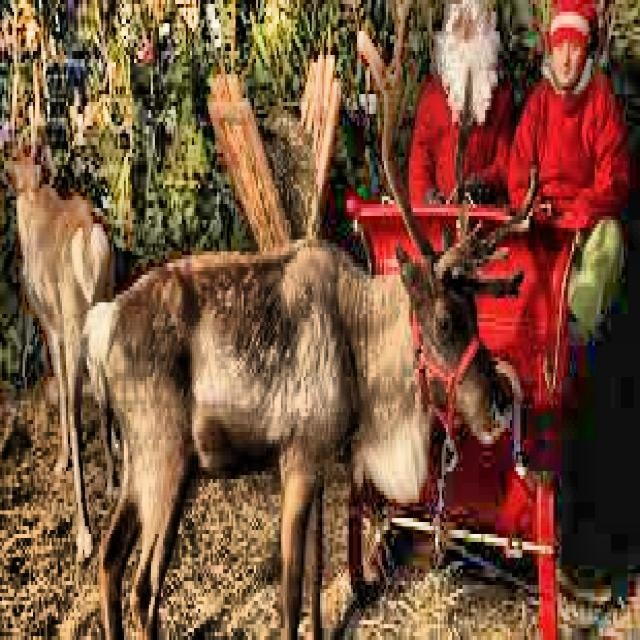

In [12]:

# YOLOv11 Model on Test Images
from ultralytics import YOLO
from IPython.display import Image, display
import os, glob

# --- Load trained model from your saved Drive location ---
MODEL_PATH = "/content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11/weights/best.pt"
model = YOLO(MODEL_PATH)
print("Model loaded successfully!")

# --- Define your test or validation folder ----------------
# Use either validation images or a test folder
TEST_DIR = "/content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11/test/images"

# Create output folder for predictions
OUTPUT_DIR = "/content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11/test_predictions"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ---  Run inference ---------------------------------------
# conf=0.25 means only predictions with >25% confidence are kept
results = model.predict(
    source=TEST_DIR,       # directory or single image
    conf=0.25,             # confidence threshold
    save=True,             # save predicted images
    save_txt=True,         # save YOLO labels with boxes
    project=OUTPUT_DIR,    # where to save
    name="results",        # subfolder name
    exist_ok=True
)

print("Predictions complete!")
print("Files saved in:", f"{OUTPUT_DIR}/results")

# --- Display a few prediction results --------------------
pred_images = glob.glob(f"{OUTPUT_DIR}/results/*.jpg")

print(f"Total test images predicted: {len(pred_images)}")
for img_path in pred_images[:5]:  # show first 5 images
    display(Image(filename=img_path))


In [13]:
!scp -r "/content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11"

usage: scp [-346ABCOpqRrsTv] [-c cipher] [-D sftp_server_path] [-F ssh_config]
           [-i identity_file] [-J destination] [-l limit]
           [-o ssh_option] [-P port] [-S program] source ... target



image 1/1 /content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11/test/images/4e6b32d6e4_jpg.rf.4447ecae0a45a74b488e62d365936539.jpg: 640x640 (no detections), 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


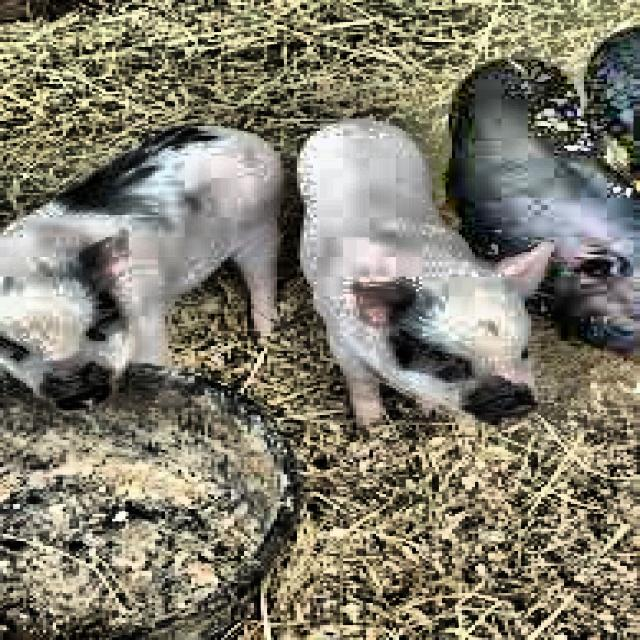

In [14]:
model = YOLO("/content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11/weights/best.pt")

results= model("/content/drive/MyDrive/CS440 Final Project/Wildlife.v1i.yolov11/test/images/4e6b32d6e4_jpg.rf.4447ecae0a45a74b488e62d365936539.jpg", save=True, conf=0.5)
results[0].show()